<a href="https://public.tableau.com/app/profile/naufal.andika/viz/CustomerShoppingAnalysisM1/Milestone1Dashboard?publish=yes">Dashboard</a>

---
Name    : Naufal Andika Ramadhan  
Batch   : HCK-14  
Obj     : This program was created for deciding what and how a product should be released based on analysing customer shopping trends dataset 


---

# Data Background & Problem Statement

As a Data Analyst, I was given the opportunity to analyse clothing trends for the company to decide which line of clothing they will be releasing their products into. Considering on how expensive it is to produce item, the client want the maximum profit they can get by releasing proper items that are most suitable by the trends. Dataset that is chosen to be processed is "Customer Shopping Trends" which can be retrieved by accessing <a href="https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset?select=shopping_trends_updated.csv">this link</a>

## SMART Framework

- Spesific: Increasing sales from releasing new clothing line
- Measurable: Reaching 20% more profit by selling clothes
- Achievable: From analysing customer shopping trends, we can strategize on how certain items that are influenced by customer behaviour
- Relevant: Analysis of clothing trends for reference to produce the most suitable article
- Time-bound: The goal is set for the next 6 months, providing a specific timeframe to work towards achieving profit

Releasing new clothing line to achieve 20% more profit within 6 months, by analysing customer shopping trends to make the most suitable article for the company

## 5W + 1 H

1. What type of items that are being purchased the most?
2. Which category of clothing have the most purchase?
3. Which gender have purchased the most?
4. When is the most suitable time for releasing new product?
5. Which region have generated the most sales?
6. How rating correlates with amount of purchases?

# Import Libraries

In [1]:
# importing libraries
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


# Data Loading

The data is obtained from Kaggle with "Customer Shopping Trends Dataset" as the title that can be accessed through <a href="https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset?select=shopping_trends_updated.csv">this link</a>. Based on the description from the page, this dataset was uploaded by Sourav Banerjee with the purpose of giving valuable insights from customer behaviour and purchasing patterns. It is also stated that this data was a syntethic dataset created for those who wanted to learn more about data analytics.  
  
These are the explanation of each columns provided:
- Customer ID - Unique identifier for each customer
- Age - Age of the customer
- Gender - Gender of the customer (Male/Female)
- Item Purchased - The item purchased by the customer
- Category - Category of the item purchased
- Purchase Amount (USD) - The amount of the purchase in USD
- Location - Location where the purchase was made
- Size - Size of the purchased item
- Color - Color of the purchased item
- Season - Season during which the purchase was made
- Review Rating - Rating given by the customer for the purchased item
- Subscription Status - Indicates if the customer has a subscription (Yes/No)
- Shipping Type - Type of shipping chosen by the customer
- Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)
- Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No)
- Previous Purchases - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
- Payment Method - Customer's most preferred payment method
- Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

In [3]:
# inserting 'shopping_trends_updated.csv' into a dataframe called df_shop
df_shop = pd.read_csv('shopping_trends_updated.csv')

# checking df_shop
df_shop

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


Data have 3900 rows and 18 columns

## Data Summary

In [4]:
# checking summary of data
df_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Data consist of 1 float64, 4 int64, and 13 object as the data type

## Identifying Missing Value

In [5]:
df_shop.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

There are no missing values from the data

## Data Duplicate Checking

In [7]:
df_shop.duplicated().sum()

0

There are also no duplicated data

# Data Cleaning

In [8]:
# dropping unused columns
drop_columns = ['Customer ID', 'Shipping Type', 'Payment Method']

df_shop = df_shop.drop(columns=drop_columns, axis =1)

# checking 10 sample of data
df_shop.sample(10)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases
714,26,Male,Jacket,Outerwear,70,South Dakota,M,Magenta,Fall,4.4,Yes,Yes,Yes,40,Fortnightly
1688,28,Male,Handbag,Accessories,26,Mississippi,S,Peach,Winter,3.0,No,No,No,13,Fortnightly
1060,27,Male,Sweater,Clothing,35,Iowa,S,Gray,Summer,2.6,No,Yes,Yes,21,Every 3 Months
220,39,Male,Sneakers,Footwear,57,Arizona,S,Indigo,Spring,3.7,Yes,Yes,Yes,48,Fortnightly
2348,54,Male,Shoes,Footwear,84,Maine,M,Orange,Spring,4.9,No,No,No,16,Every 3 Months
1297,44,Male,Sandals,Footwear,85,New Jersey,M,Silver,Summer,4.6,No,Yes,Yes,32,Annually
2408,23,Male,Sneakers,Footwear,55,Hawaii,XL,Black,Fall,4.2,No,No,No,44,Every 3 Months
3755,64,Female,Skirt,Clothing,93,Pennsylvania,M,Peach,Fall,3.4,No,No,No,26,Monthly
1509,20,Male,Dress,Clothing,54,New Hampshire,XL,White,Summer,4.6,No,Yes,Yes,44,Annually
1270,67,Male,Hoodie,Clothing,98,West Virginia,M,Green,Fall,3.3,No,Yes,Yes,20,Annually


Since the data was already clean there was no cleaning needed other than dropping unused columns:
- `Customer ID` = isn't necessary because it is the same like index
- `Shipping Type` = isn't necessary because we don't dive deeper into shipment
- `Payment Method` = isn't necessary because we also not making any analysis on ways customer pay their orders  
  
The reason why the rest which are not in the 5W + 1H were not dropped because it may be used for correlation testing if `Review Rating` turns out to have little to no correlation to `Purchase Amount`

# Analysis & Calculation

## Central Tendency of Purchase Amount

In [13]:
# calculating mean, median, mode, standard deviation, variance, skewness, and kurtosis
avg_purchase = df_shop["Purchase Amount (USD)"].mean()
median_purchase = df_shop["Purchase Amount (USD)"].median()
mode_purchase = df_shop["Purchase Amount (USD)"].mode()

std_purchase = df_shop["Purchase Amount (USD)"].std()
var_purchase = df_shop["Purchase Amount (USD)"].var()

skew_purchase = df_shop["Purchase Amount (USD)"].skew()
kurtosis_purchase = df_shop["Purchase Amount (USD)"].kurtosis()

print(f"Average value of purchase amount: {avg_purchase:.2f}")
print(f"Median value of purchase amount: {median_purchase}")
print(f"Standard deviation of purchase amount: {std_purchase:.2f}")
print(f"Variance of purchase amount: {var_purchase:.2f}")
print(f"Skewness of purchase amount: {skew_purchase:.2f}")
print(f"Kurtosis of purchase amount: {kurtosis_purchase:.2f}")


Average value of purchase amount: 59.76
Median value of purchase amount: 60.0
Standard deviation of purchase amount: 23.69
Variance of purchase amount: 561.00
Skewness of purchase amount: 0.01
Kurtosis of purchase amount: -1.24


From calculation above we can see we have:
- Average value of purchase amount: 59.76
- Median value of purchase amount: 60
- Standard deviation of purchase amount: 23.69
- Variance of purchase amount: 561
- Skewness of purchase amount: 0.01
- Kurtosis of purchase amount: -1.24
  
According to skewness value of **0.01**, the distribution of `Purchase Amount (USD)` in this dataset is considered approximately symmetric and by kurtosis value of **-1.24** means that `Purchase Amount (USD)` has  lighter  tails  and  a  flatter  peak compared  to  a  normal  distribution. It  indicates fewer outliers or extreme values than a normal distribution.

## 1. What type of items that are being purchased the most?

In [14]:
# checking unique values of item purchased
df_shop['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

List of item names consist of Blouse, Sweater, Jeans, Sandals, Sneakers, Shirt, Shorts, Coat, Handbag, Shoes, Dress, Skirt, Sunglasses, Pants, Jacket, Hoodie, Jewelry, T-Shirt, Scarf, Hat, Socks, Backpack, Belt, Boots, and Gloves

In [16]:
# grouping and sorting value to find items with the most amount of purchase
top_items = df_shop.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(5).reset_index()

top_items

,Item Purchased,Purchase Amount (USD)
0,Blouse,10410
1,Shirt,10332
2,Dress,10320
3,Pants,10090
4,Jewelry,10010


From the data above we can see the ranking of item based on their purchase amount:
1. Blouse with 10410 Purchase Amount
2. Shirt with 10332 Purchase Amount
3. Dress with 10320 Purchase Amount
4. Pants with 10090 Purchase Amount
5. Jewelry 10010 Purchase Amount
  

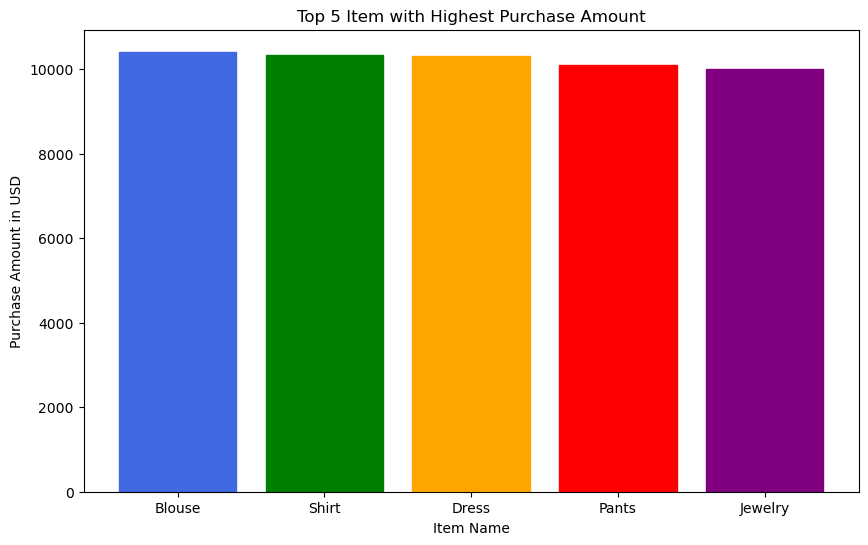

In [24]:
# creating barchart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_items['Item Purchased'], top_items['Purchase Amount (USD)'])
plt.xlabel('Item Name')
plt.ylabel('Purchase Amount in USD')
plt.title('Top 5 Item with Highest Purchase Amount')
plt.xticks(rotation=0, ha='center') 

# assigning different colors to each bar
colors = ['royalblue', 'green', 'orange', 'red', 'purple']
for bar, color in zip(bars, colors):
    bar.set_color(color)


plt.show()

Based on the calculation and visualization, the item that have the most amount of sales is **Blouse** with $10,410 sales revenue, followed by **Shirt** and **Dress**. With that data we can consider to release a **Blouse, Shirt, or Dress** article.

## 2. Which category of clothing have the most purchase?

In [25]:
# checking unique values of category
df_shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

Category column consist of Clothing, Footwear, Outerwear, and Accessories

In [26]:
# grouping and sorting value to find items with the most amount of purchase
top_cat = df_shop.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

top_cat

Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

From the data above we can see the ranking of category based on their purchase amount:
1. Clothing with 104264 Purchase Amount
2. Accessories with 74200 Purchase Amount
3. Footwear with 36093 Purchase Amount
4. Outerwear with 18524 Purchase Amount
  

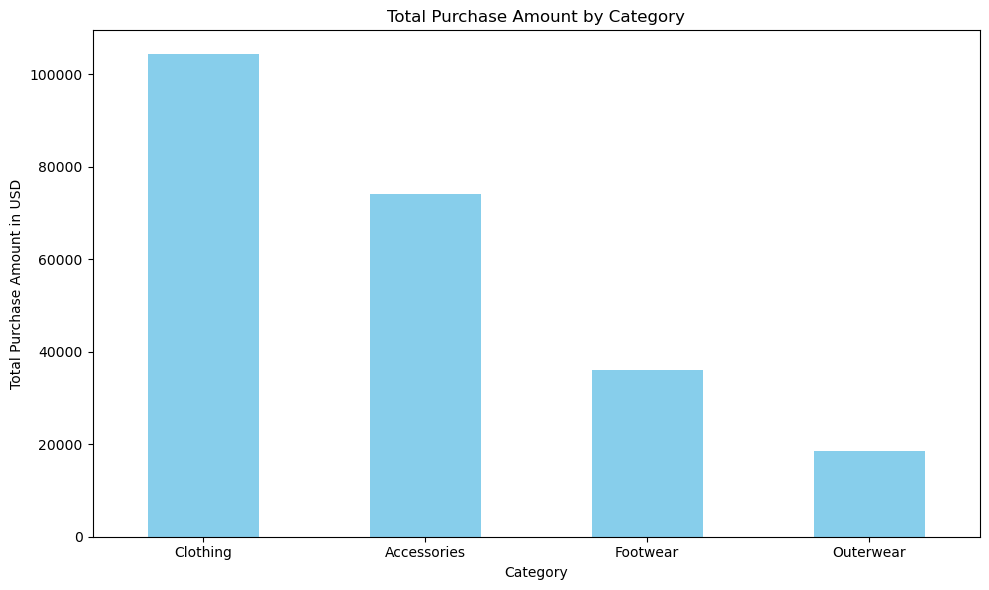

In [29]:
# Creating barchart
plt.figure(figsize=(10, 6))
top_cat.plot(kind='bar', color='skyblue')

plt.xlabel('Category')
plt.ylabel('Total Purchase Amount in USD')
plt.title('Total Purchase Amount by Category')

plt.xticks(rotation=0, ha='center') 
plt.tight_layout()

plt.show()

Based on analysis and visualization above we can see that releasing a clothing line is the correct choice to make, since clothing category have the most total purchase amount with $104.264 total revenue, followed by accessories, footwear, and outerwear on the last place

## 3. Which gender have purchased the most?

In [30]:
# calculating the distribution of gender
gender_dis = df_shop['Gender'].value_counts()
gender_dis

Gender
Male      2652
Female    1248
Name: count, dtype: int64

From calculation above there are 2652 purchases done by male and 1248 purchases done by female

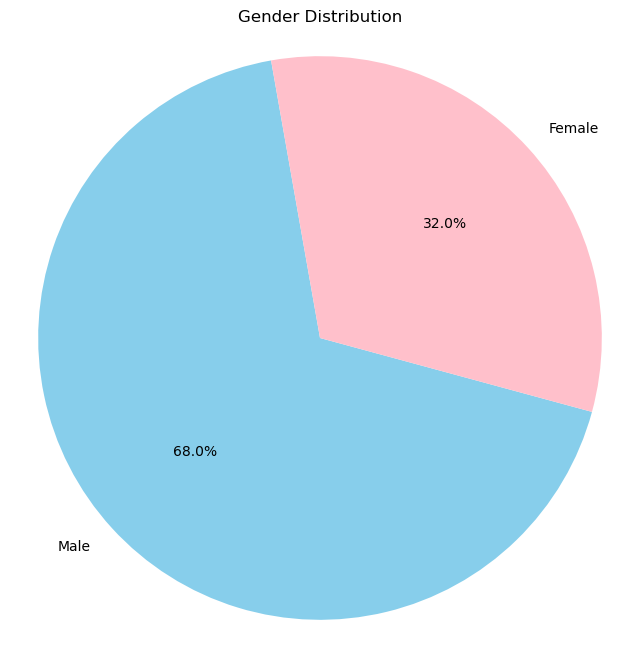

In [34]:
# create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_dis, labels=gender_dis.index, autopct='%1.1f%%', startangle=100, colors=['skyblue', 'pink'])
plt.title('Gender Distribution')
# equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

plt.show()

From the pie chart above we can see that 68% of sales are coming from Male and 32% are coming from Female, meaning that most of our sales are coming from Male

In [37]:
# grouping gender based on purchase amount
sales_by_gender = df_shop.groupby('Gender')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
sales_by_gender

Gender
Male      157890
Female     75191
Name: Purchase Amount (USD), dtype: int64

From calculation above we can see that Male customer generated $157.890 amount of revenue and Female customer generated $72.191 amount of revenue

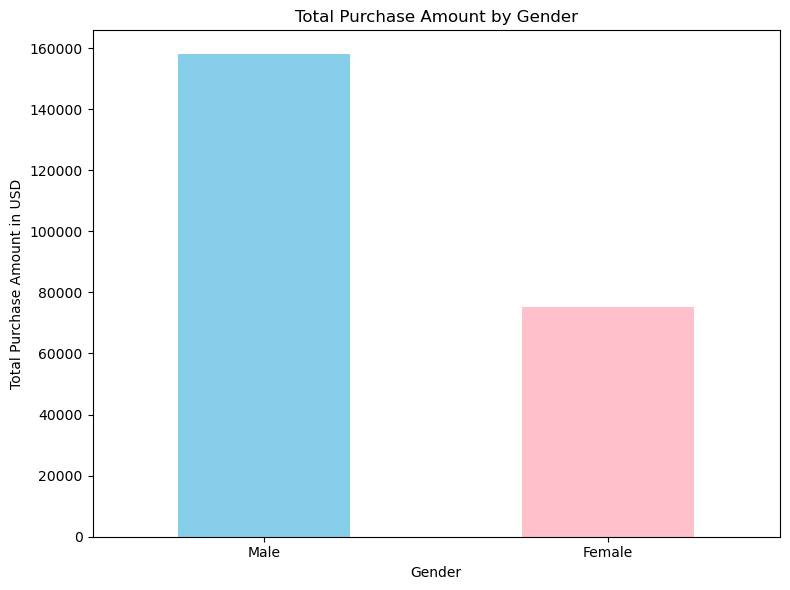

In [38]:
# create a bar chart of gender and purchase amount
plt.figure(figsize=(8, 6))
sales_by_gender.plot(kind='bar', color=['skyblue', 'pink'])

plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount in USD')
plt.title('Total Purchase Amount by Gender')

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

According to calculation and visualization above, we can see that not only most of our customers are Male, they also generate much bigger revenue with $157.890

### Average Purchase Amount by Gender Comparison

Using two sample test, we will conduct a hypothesis testing on "Are there any significant difference between the average purchase amount from male customer and female customer?"  
**$H_0$ : Average purchase amount by male customer is the same as female customer  
$H_1$ : Average purchase amount by male customer is NOT the same as female customer**

In [42]:
# separating male and female from gender column
male_data = df_shop[df_shop['Gender'] == 'Male']
female_data = df_shop[df_shop['Gender'] == 'Female']

# two sample t-test formula
t_statistic, p_value = stats.ttest_ind(male_data['Purchase Amount (USD)'], female_data['Purchase Amount (USD)'])

print("T-statistic :", t_statistic)
print("P-value :", p_value)

T-statistic : -0.8769152065030424
P-value : 0.38058673555268097


With 0.38058673555268097 p-value means that the p-value < critical value which is 0.05. From that calculation we can concludes that $H_0$ is rejected, meaning that the average purchase amount by male customer is NOT the same as the average purchase amount by female customer. Furthermore supports the argument that we should focus on creating a product that is targeted towards our male customer

## 4. When is the most suitable time for releasing new product?

In [43]:
# checking unique values of season
df_shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

Column season consist of Winter, Spring, Summer, and Fall

In [49]:
# calculating sales per season
sales_by_season = df_shop.groupby('Season')['Purchase Amount (USD)'].sum()
# ordering season name by these order
desired_order = ['Spring', 'Summer', 'Fall', 'Winter']
# reindexing season order
sales_by_season_ordered = sales_by_season.reindex(desired_order)
sales_by_season_ordered

Season
Spring    58679
Summer    55777
Fall      60018
Winter    58607
Name: Purchase Amount (USD), dtype: int64

With calculation above we get the total purchase amount by season:
- Spring with $58.679 total purchase amount
- Summer with $55.777 total purchase amount
- Fall with $60.018 total purchase amount
- Winter with $58.607 total purchase amount

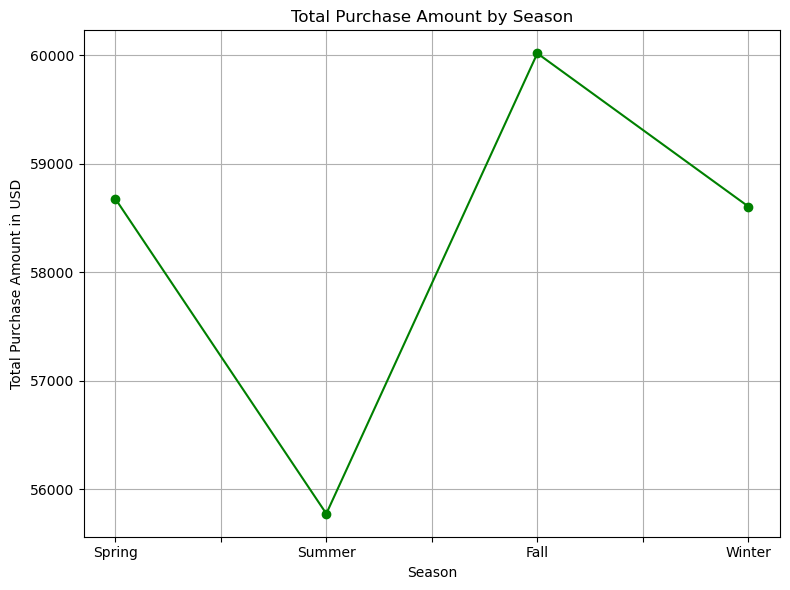

In [51]:
# creating line figure based on total purchase amount by season
plt.figure(figsize=(8, 6))
sales_by_season_ordered.plot(marker='o', color='green', linestyle='-')

plt.xlabel('Season')
plt.ylabel('Total Purchase Amount in USD')
plt.title('Total Purchase Amount by Season')

# adding gridline for visibility
plt.grid(True)
plt.tight_layout()

plt.show()

From visualization above we can see that the differences between seasons are not that different but to gain the most revenue we can start selling products in Fall instead of Summer when the revenue is the lowest between all the season

## 5. Which region have generated the most sales?

In [60]:
# checking unique value from location
df_shop['Location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

Location column consist of all the 50 states in the United States of America

In [53]:
# grouping location based on total purchase amount
sales_by_location = df_shop[['Location','Purchase Amount (USD)']].groupby('Location').sum().sort_values(by='Purchase Amount (USD)', ascending=False)
sales_by_location

,Purchase Amount (USD)
Location,
Montana,5784
Illinois,5617
California,5605
Idaho,5587
Nevada,5514
Alabama,5261
New York,5257
North Dakota,5220
West Virginia,5174


From the data above we can see that Montana state leads with $5784 amount of revenue followed by Illinois state with $5617 amount of revenue, and California state with $5605 amount of revenue. With Florida, Hawaii, and Kansas state on the last 3 lowest states that generate the least amount of revenue on Florida with $3798, Hawaii with $3752, and Kansas with $3437.

In [52]:
# grouping and sorting value to find items with the most amount of purchase
top_location = df_shop.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10).reset_index()

top_location

,Location,Purchase Amount (USD)
0,Montana,5784
1,Illinois,5617
2,California,5605
3,Idaho,5587
4,Nevada,5514
5,Alabama,5261
6,New York,5257
7,North Dakota,5220
8,West Virginia,5174
9,Nebraska,5172


From calculation above we can see the ranking of 10 states that makes the most purchase amount, the rankings are:
1. Montana state
2. Illinois state
3. California state
4. Idaho state
5. Nevada state
6. Alabama state
7. New York state
8. North Dakota state
9. West Virginia state
10. Nebraska state
  
Making all of those states to be the priority on where should we release our products into

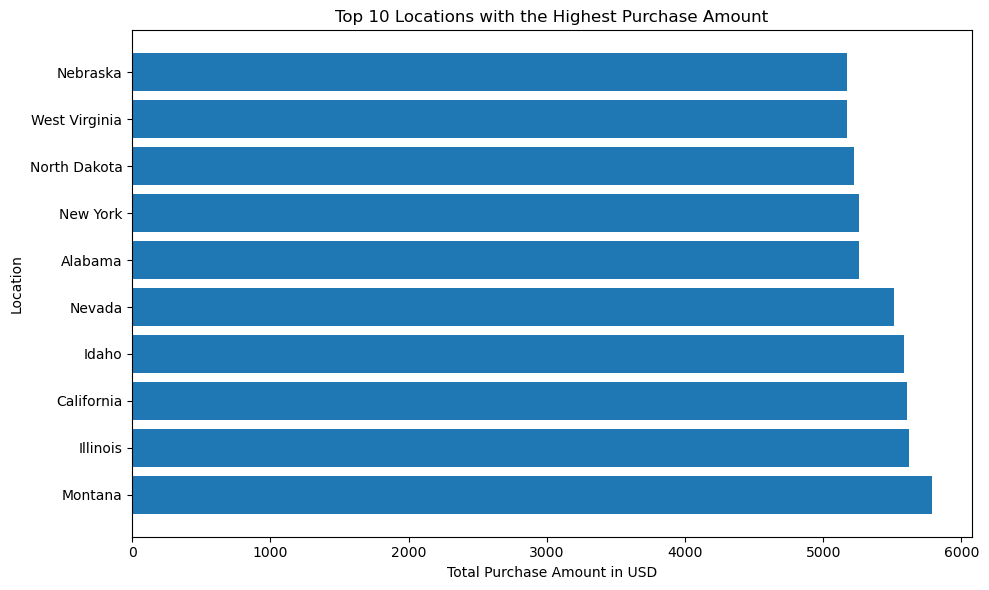

In [66]:
# making a barchart of 10 best location
plt.figure(figsize=(10, 6))
plt.barh(top_location['Location'], top_location['Purchase Amount (USD)'])

plt.xlabel('Total Purchase Amount in USD')
plt.ylabel('Location')
plt.title('Top 10 Locations with the Highest Purchase Amount')

plt.tight_layout()
plt.show()

From barchart above we can see that among the top states the differences in purchase amount isn't that far from each other. Thus, furthermore supports our decision on focusing to release clothing line to those states above

## 6. How rating correlates with amount of purchases?

After conducting a thorough analyzation on product performance, we can analyse how rating correlates with amount of purchases. With the goal of understanding customer satisfaction. Since the data have normal distribution, we will use pearson as the method to calculate the correlation.

In [72]:
# calculating correlation between rating and purchase amount 
corr_r, pval_p = stats.pearsonr(df_shop['Review Rating'], df_shop['Purchase Amount (USD)'])

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")

r-correlation: 0.03, p-value: 0.054631573624773264


Having 0.03 correlation score means that Review Rating and Purchase Amount have very weak correlation meaning that we can't use rating solely for customer satisfaction measure. Also by looking at p-value of 0.0546 we can say that the correlation between them are happening by chance

### Using other column to measure customer satisfaction

In [73]:
# Converting yes and no from subscription status, discount applied, and promo code used to 1 for yes and 0 for no
df_shop['Subscription Status'] = df_shop['Subscription Status'].map({'Yes': 1, 'No': 0})
df_shop['Discount Applied'] = df_shop['Discount Applied'].map({'Yes': 1, 'No': 0})
df_shop['Promo Code Used'] = df_shop['Promo Code Used'].map({'Yes': 1, 'No': 0})
# calculating correlation between subscription status, discount applied, and promo code used with purchase amount 
corr_r_sub, pval_p_sub = stats.pearsonr(df_shop['Subscription Status'], df_shop['Purchase Amount (USD)'])
corr_r_disc, pval_p_disc = stats.pearsonr(df_shop['Discount Applied'], df_shop['Purchase Amount (USD)'])
corr_r_promo, pval_p_promo = stats.pearsonr(df_shop['Promo Code Used'], df_shop['Purchase Amount (USD)'])

print(f"r-correlation: {corr_r_sub:.2f}, p-value: {pval_p_sub} of subscription status")
print(f"r-correlation: {corr_r_disc:.2f}, p-value: {pval_p_disc} of discount applied")
print(f"r-correlation: {corr_r_promo:.2f}, p-value: {pval_p_promo} of promo code used")

r-correlation: -0.01, p-value: 0.6622796924526275 of subscription status
r-correlation: -0.02, p-value: 0.26647372005775344 of discount applied
r-correlation: -0.02, p-value: 0.26647372005775344 of promo code used


From calculation above we can see that we have very weak correlation between subscription status, discount applied, and promo code used with purchase amount. Meaning that we need another way to calculate customer satisfaction with our product

In [74]:
# saving processed data to csv
df_shop.to_csv('processedshoppingdata.csv')

# Conclusion

- Data from this dataset have a normal distribution with skewness value of 0.01, and kurtosis value of -1.24 meaning that this data is considered a platykurtic with lighter tails and a flatter peak
- Type of Item that have the most amount of purchase are:
    - Blouse with $10,410 sales revenue
    - Shirt with $10,332 sales revenue
    - Dress with $10,320 sales revenue
- Clothing have the most amount of purchase with $104,264 sales revenue
- 68% of our orders are from Male gender and 32% of our orders are from Female
- Conducting a hypothesis testing from:
    - $H_0$: Average purchase amount by male customer is the same as female customer
    - $H_1$: Average purchase amount by male customer is NOT the same as female customer
- From calculating average purchase amount of each gender we fail to reject $H_0$ with p-value of 0.38 which is < 0.05
- Fall season have the most amount of purchase with $60,018 sales revenue
- States that contributed the most purchase amount are:
    - Montana with $5,784 sales revenue
    - Illinois with $5,617 sales revenue
    - California with $5,605 sales revenue
    - Idaho with $5,587
    - Nevada with $5,514
- Correlation checking of Rating, Subscription Status, Discount Applied, and Promo Code Used with Purchase Amount as a customer satisfaction measure resulting:
    - Rating having a very weak correlation with r-correlation of 0.03
    - Subscription Status having a very weak correlation with r-correlation of -0.01
    - Discount Applied having a very weak correlation with r-correlation of -0.02
    - Promo Code Used having a very weak correlation with r-correlation of -0.02

# Recommendation

- To gain the most amount of amount purchased we should release a clothing line with these criteria:
    - A Blouse as the type of item
    - Targeting Male as the primary focus
    - Release on Fall Season
    - Release in state of Montana
- Find another metric to be measured as customer satisfaction since the one that we already have is not correlated with amount purchased